#**Quadratic Programming**

A quadratic program is an optimization problem with a quadratic objective and affine equality and inequality constraints. A common standard form is the following:

\begin{equation}
\begin{aligned}
\min_{x} \quad & \frac{1}{2}x^{T}Px + q^Tx \\
\textrm{s.t.} \quad & Gx \leq h\\
& Ax =b
\end{aligned}
\end{equation}

Concider the following optimizational problem
\begin{equation}
\begin{aligned}
\min_{x} \quad & (x_1+x_2-8)^2\\
\textrm{s.t.} \quad & x_1-x_2\leq -6\\
\end{aligned}
\end{equation}

We need to rewrite the quadratic equation in the proper matrix equation as above.
First, consider the matrix notation for a general quadratic function of two variables: $x_1$ and $x_2$:

\begin{equation}
\begin{aligned}
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad
P = \begin{bmatrix} p_{11} & p_{12} \\ p_{21} & p_{22} \end{bmatrix} \quad
q^T = \begin{bmatrix} q_1 & q_2 \end{bmatrix}
\end{aligned}
\end{equation}

Second we can extract the matrix $P$ and vector $q^T$ by parameter mapping

\begin{equation}
\begin{aligned}
\frac{1}{2}x^{T}Px + q^Tx = & \frac{1}{2} 
\begin{bmatrix} x_1 & x_2 \end{bmatrix}
\begin{bmatrix} p_{11} & p_{12} \\ p_{21} & p_{22} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}+
\begin{bmatrix} q_1 & q_2 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=\\
& \frac{1}{2}(p_{11}x_1^2+p_{22}x_2^2 +(p_{12}+p_{21})x_1x_2)+q_1x_1+q_2x_2
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
(x_1+x_2-8)^2 = x_1^2+x_2^2+2x_1x_2-16x_1-16x_2+64
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
P = \begin{bmatrix} p_{11} & p_{12} \\ p_{21} & p_{22} \end{bmatrix} =
\begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix} \\
q^T = \begin{bmatrix} q_1 & q_2 \end{bmatrix} =
\begin{bmatrix} -16 & -16 \end{bmatrix}
\end{aligned}
\end{equation}

Similarly, the constraint matrix $G$ and the vector $h$ can be found:

\begin{equation}
\begin{aligned}
G = \begin{bmatrix} g_{11} & g_{12}  \end{bmatrix} =
\begin{bmatrix} 1 & -1 \end{bmatrix} \\
h=\begin{bmatrix} -6 \end{bmatrix}
\end{aligned}
\end{equation}

**Code and output**

In [ ]:
import cvxpy as cp
import numpy as np

size_x = 2

P = np.array([[2, 2], [2, 2]])
q = np.array([[-16],[-16]])
G = np.array([[1, -1]])
h = np.array([[-6]])

x = cp.Variable(size_x)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T @ x),
                 [G @ x <= h])
prob.solve()
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)


The optimal value is -63.99999999948304
A solution x is
[-0.79992672  8.79994946]


Therefore, when $x_1 = -0.8$ and $x_2 = 8.8$ the quadratic function is minimized (-64 + 64 = 0, don’t forget the constant 64). 

In [ ]:
print((x.value[0]+x.value[1]-8)*(x.value[0]+x.value[1]-8))
print(x.value[0]-x.value[1])

5.169720269488514e-10
-9.599876186517633


Some other libraries to solve QP problems (quadprog, solveQP)

In [ ]:
!pip install qpsolvers
from qpsolvers import solve_qp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 KB 2.8 MB/s eta 0:00:00


In [ ]:
x = solve_qp(P, q, G, h, A=None, b=None, solver="osqp")
print(f"QP solution: x = {x}")

QP solution: x = [-0.79992672  8.79994946]


/usr/local/lib/python3.8/dist-packages/qpsolvers/conversions/warnings.py:35: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/qpsolvers/conversions/warnings.py:35: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


## **Task 1**
Concider the following minimization problem
\begin{equation}
\begin{aligned}
\min_{x} \quad & (Ax-b)^T(Ax-b)\\
\textrm{s.t.} \quad & Gx \leq h\\
\end{aligned}
\end{equation}
1. Firstly, lets consider this problem without constrains and try to solve it analytically and then as well as QP problem and compare the results. Take
\begin{equation}
\begin{aligned}
A = \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 3 & 2 \end{bmatrix} \quad
b = \begin{bmatrix} 2 \\ 3 \\ 4 \end{bmatrix}
\end{aligned}
\end{equation}
2. Then add the constraints $-0.9\leq x \leq 0.9$ and solve again

In [ ]:
A = np.array([[1, 1], [2, 1], [3, 2]])
b = np.array([[2], [3], [4]])

## Task 2. Least squares estimation

A sphere is described by $\{ x \in \mathbb{R}^n \mid \left \| x - x_c \right \|_2 = r\}$. Let's try to fit a sphere in $\mathbb{R}^n$ for a given m number of points ($u_1, u_2,...,u_m \in \mathbb{R}^n$), by minimizing the following error function:
\begin{equation}
    \sum_{i=1}^m (\left \| u_i -x_c \right \|_2^2-r^2)^2
\end{equation} over the variables $x_c \in \mathbb{R}^n, \; r \in \mathbb{R}$.
Using CVXPY formulate the latter equation for $\mathbb{R}^2$ where $n$ number of points can be generated as follows:

[2.99282898 4.01522411]


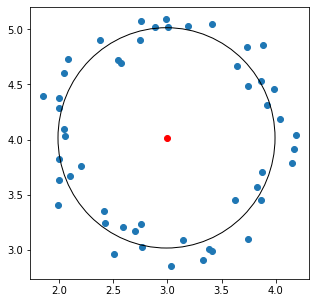

In [ ]:
import matplotlib.pyplot as plt 
import random 

# Generate the points
npoints = 50
r = 1 
c1 = (3, 4)
plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False) 
x = c1[0] + r * np.cos(t) + np.random.uniform(-0.2,0.2,t.shape[0])
y = c1[1] + r * np.sin(t) + np.random.uniform(-0.2,0.2,t.shape[0])
plt.scatter(x, y, c='0.8')
U = np.vstack((x,y))

plt.show()

To help to solve the previous task:
\begin{equation}
r^2  = \frac{1}{m} \sum_{i=1}^m  \left \| u_i -x_c \right \|_2^2
\end{equation}
Formulate the problem as a least squares problem in the form : $\min_x \left \| Ax -b \right \|_2^2$.